In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [49]:

# Read in the extracted data from CSV files
department_df = pd.read_csv('Department_Information.csv')
employee_df = pd.read_csv('Employee_Information.csv')
counseling_df = pd.read_csv('Student_Counceling_Information.csv')
performance_df = pd.read_csv('Student_Performance_Data.csv')

print("Department Information:")
print(department_df.head())

print("\nEmployee Information:")
print(employee_df.head())

print("\nStudent Counseling Information:")
print(counseling_df.head())

print("\nStudent Performance Data:")
print(performance_df.head())


Department Information:
  Department_ID                 Department_Name         DOE
0     IDEPT4670           Aerospace Engineering   5/31/1961
1     IDEPT5528  Biosciences and Bioengineering   6/28/1943
2     IDEPT3115            Chemical Engineering    5/1/1940
3     IDEPT5881                       Chemistry    6/8/2013
4     IDEPT4938               Civil Engineering  10/27/1941

Employee Information:
  Employee ID         DOB         DOJ Department_ID
0    IU196557   2/23/1983  10/31/2009     IDEPT4938
1    IU449901    9/2/1985    6/7/2009     IDEPT2357
2    IU206427   7/30/1971    5/9/2008     IDEPT4670
3    IU688905   7/20/1973   1/17/2002     IDEPT2601
4    IU634582  11/16/1991   2/13/2000     IDEPT7626

Student Counseling Information:
    Student_ID       DOA        DOB Department_Choices Department_Admission
0  SID20131143  7/1/2013   2/5/1996          IDEPT7783            IDEPT7783
1  SID20131151  7/1/2013  7/31/1995          IDEPT6347            IDEPT6347
2  SID20131171  7/1/

In [50]:
performance_df.describe(include='all')

# please note these NaN values indicate that numeric data types cannot be applied to categorical data, unless the cateforical data is given a numeric type

,Student_ID,Semster_Name,Paper_ID,Paper_Name,Marks,Effort_Hours
count,209610,209610,209610,209609,209608.000000,209609.000000
unique,3819,8,56,7,NaN,NaN
top,SID20161237,Sem_7,SEMI0071868,Paper 6,NaN,NaN
freq,56,26236,3761,29975,NaN,NaN
mean,NaN,NaN,NaN,NaN,69.593546,8.085216
std,NaN,NaN,NaN,NaN,18.220346,2.797997
min,NaN,NaN,NaN,NaN,-100.000000,-3.000000
25%,NaN,NaN,NaN,NaN,54.000000,6.000000
50%,NaN,NaN,NaN,NaN,70.000000,7.000000
75%,NaN,NaN,NaN,NaN,85.000000,10.000000


In [51]:
print("\nList of invalid 'Marks' (Mark < 0 OR Mark > 100) in 'Student Performance Data':")
invalid_marks_df = performance_df[(performance_df['Marks'] < 0) | (performance_df['Marks'] > 100)]
print(invalid_marks_df)


List of invalid 'Marks' (Mark < 0 OR Mark > 100) in 'Student Performance Data':
         Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
328     SID20131189        Sem_1  SEMI0015910    Paper 4  -49.0           0.0
414     SID20131191        Sem_5  SEMI0055015    Paper 6  207.0          14.0
551     SID20131231        Sem_1  SEMI0016208    Paper 5 -100.0          14.0
840     SID20131303        Sem_3  SEMI0031818    Paper 4  140.0          14.0
181488  SID20182774        Sem_8  SEMI0086600    Paper 6  999.0           5.0


In [52]:
''' Alternate DeMorgan Theorem Logic (Because why not) '''
'''
print("\nList of valid 'Marks' (Mark >= 0 AND Mark <= 100) in 'Student Performance Data':")
invalid_marks_df != performance_df[(performance_df['Marks'] < 0) | (performance_df['Marks'] > 100)]
print(invalid_marks_df)
'''

difference = (performance_df['Marks'].count() - invalid_marks_df['Marks'].count())
print("\nList of valid 'Marks' (Mark >= 0 AND Mark <= 100) in 'Student Performance Data':")
print(f"\n*** Total Dataframe size should be {difference} rows ***\n")
valid_marks_df = performance_df[(performance_df['Marks'] >= 0) & (performance_df['Marks'] <= 100)]
print(valid_marks_df)


List of valid 'Marks' (Mark >= 0 AND Mark <= 100) in 'Student Performance Data':

*** Total Dataframe size should be 209603 rows ***

         Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
0       SID20131143        Sem_1  SEMI0012995    Paper 1   44.0           5.0
1       SID20131143        Sem_1  SEMI0015183    Paper 2   74.0           8.0
2       SID20131143        Sem_1  SEMI0018371    Paper 3   80.0           8.0
3       SID20131143        Sem_1  SEMI0015910    Paper 4   44.0           5.0
4       SID20131143        Sem_1  SEMI0016208    Paper 5   95.0          12.0
...             ...          ...          ...        ...    ...           ...
209605  SID20189989        Sem_8  SEMI0082598    Paper 3   94.0          12.0
209606  SID20189989        Sem_8  SEMI0088030    Paper 4   49.0           5.0
209607  SID20189989        Sem_8  SEMI0081794    Paper 5   47.0         257.0
209608  SID20189989        Sem_8  SEMI0086600    Paper 6   87.0          11.0
209609 

In [53]:
# This is to remove the missing values from any column
# We did a copy of the valid_marks_df due to a strange warning indicating that there could be a future issue with simply manpulting the prior cell's dataframe

valid_marks_df = valid_marks_df.copy()

null_mask = valid_marks_df.isnull().any(axis=1)
print("\nCount of missing values before drop in 'Student Performance Data':")
print(valid_marks_df.isnull().sum())
print("\nRemoved values are:")
print(valid_marks_df[null_mask])
print("\nCount of missing values after drop in 'Student Performance Data':")
print(valid_marks_df.isnull().sum())


Count of missing values before drop in 'Student Performance Data':
Student_ID      0
Semster_Name    0
Paper_ID        0
Paper_Name      1
Marks           0
Effort_Hours    0
dtype: int64

Removed values are:
      Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
125  SID20131171        Sem_3  SEMI0031818        NaN   87.0          11.0

Count of missing values after drop in 'Student Performance Data':
Student_ID      0
Semster_Name    0
Paper_ID        0
Paper_Name      0
Marks           0
Effort_Hours    0
dtype: int64


In [54]:
print("\nList of invalid 'Effort_Hours' ('Effort_Hours' < 0) in 'Student Performance Data':")
invalid_effort_df = valid_marks_df[(valid_marks_df['Effort_Hours'] < 0)]
print(invalid_effort_df)


List of invalid 'Effort_Hours' ('Effort_Hours' < 0) in 'Student Performance Data':
        Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
59635  SID20147406        Sem_6  SEMI0067259    Paper 2   78.0          -3.0


In [55]:
difference = (valid_marks_df['Effort_Hours'].count() - invalid_effort_df['Effort_Hours'].count())
print("\nList of valid 'Effort_Hours' ('Effort_Hours' >= 0) in 'Student Performance Data':")
print(f"\n*** Total Dataframe size should be {difference} rows ***\n")
valid_effort_df = valid_marks_df[(valid_marks_df['Effort_Hours'] >= 0)]
print(valid_effort_df)


List of valid 'Effort_Hours' ('Effort_Hours' >= 0) in 'Student Performance Data':

*** Total Dataframe size should be 209601 rows ***

         Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
0       SID20131143        Sem_1  SEMI0012995    Paper 1   44.0           5.0
1       SID20131143        Sem_1  SEMI0015183    Paper 2   74.0           8.0
2       SID20131143        Sem_1  SEMI0018371    Paper 3   80.0           8.0
3       SID20131143        Sem_1  SEMI0015910    Paper 4   44.0           5.0
4       SID20131143        Sem_1  SEMI0016208    Paper 5   95.0          12.0
...             ...          ...          ...        ...    ...           ...
209605  SID20189989        Sem_8  SEMI0082598    Paper 3   94.0          12.0
209606  SID20189989        Sem_8  SEMI0088030    Paper 4   49.0           5.0
209607  SID20189989        Sem_8  SEMI0081794    Paper 5   47.0         257.0
209608  SID20189989        Sem_8  SEMI0086600    Paper 6   87.0          11.0
209609

In [56]:
valid_effort_df = valid_effort_df.copy()

null_mask = valid_effort_df.isnull().any(axis=1)
print("\nCount of missing values before drop in 'Student Performance Data':")
print(valid_effort_df.isnull().sum())
print("\nRemoved values are:")
print(valid_effort_df[null_mask])
valid_effort_df.dropna(how='any', inplace=True)
print("\nCount of missing values after drop in 'Student Performance Data':")
print(valid_effort_df.isnull().sum())




Count of missing values before drop in 'Student Performance Data':
Student_ID      0
Semster_Name    0
Paper_ID        0
Paper_Name      0
Marks           0
Effort_Hours    0
dtype: int64

Removed values are:
Empty DataFrame
Columns: [Student_ID, Semster_Name, Paper_ID, Paper_Name, Marks, Effort_Hours]
Index: []

Count of missing values after drop in 'Student Performance Data':
Student_ID      0
Semster_Name    0
Paper_ID        0
Paper_Name      0
Marks           0
Effort_Hours    0
dtype: int64


In [57]:
# There is one outlier in the Student_Performance_Information data set, specifically where the Effort_Hours are 257 hours and the mark is 47
# We have taken the liberty of removing this specific point as it was terribly skewing the graphs and visualizations
# to a point that it was difficult to understand the data
# This specific data point is one that definiately seems errorneous and an outlier compared to the other points
# hence may affect the predictive model in a unforeseen manner too. 

valid_effort_df = valid_effort_df.copy()

rows_to_delete = valid_effort_df[valid_effort_df['Effort_Hours'] == 257]

print("Rows to delete:")
print(rows_to_delete)

valid_effort_df.drop(rows_to_delete.index, inplace=True)


Rows to delete:
         Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
209607  SID20189989        Sem_8  SEMI0081794    Paper 5   47.0         257.0


In [58]:
cleaned_performance_df = valid_effort_df
print(cleaned_performance_df)

         Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
0       SID20131143        Sem_1  SEMI0012995    Paper 1   44.0           5.0
1       SID20131143        Sem_1  SEMI0015183    Paper 2   74.0           8.0
2       SID20131143        Sem_1  SEMI0018371    Paper 3   80.0           8.0
3       SID20131143        Sem_1  SEMI0015910    Paper 4   44.0           5.0
4       SID20131143        Sem_1  SEMI0016208    Paper 5   95.0          12.0
...             ...          ...          ...        ...    ...           ...
209604  SID20189989        Sem_8  SEMI0081989    Paper 2   97.0          13.0
209605  SID20189989        Sem_8  SEMI0082598    Paper 3   94.0          12.0
209606  SID20189989        Sem_8  SEMI0088030    Paper 4   49.0           5.0
209608  SID20189989        Sem_8  SEMI0086600    Paper 6   87.0          11.0
209609  SID20189989        Sem_8  SEMI0083259    Paper 6   73.0           8.0

[209600 rows x 6 columns]


In [59]:
cleaned_performance_df.shape

(209600, 6)

In [60]:
print(cleaned_performance_df.corr(numeric_only=True))

# This indicates that there is strong positive co-relation between the Effort Hours and the Marks
# Which is a good sign when it comes to predictive models

                 Marks  Effort_Hours
Marks         1.000000      0.965847
Effort_Hours  0.965847      1.000000


In [61]:
print(cleaned_performance_df.describe())

               Marks   Effort_Hours
count  209600.000000  209600.000000
mean       69.589480       8.084046
std        18.098348       2.744450
min        19.000000       2.000000
25%        54.000000       6.000000
50%        70.000000       7.000000
75%        85.000000      10.000000
max       100.000000      14.000000


<Axes: title={'center': 'Cleaned Full Scatterplot of Effort Hours vs Marks'}, xlabel='Effort_Hours', ylabel='Marks'>

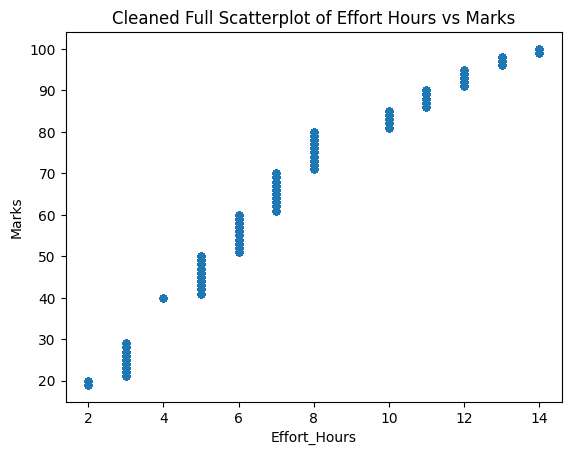

In [62]:
# Plot scatterplot after cleaning
valid_effort_df.plot.scatter(x='Effort_Hours', y='Marks', title='Cleaned Full Scatterplot of Effort Hours vs Marks')

<Axes: title={'center': 'Uncleaned Full Scatterplot of Effort Hours vs Marks'}, xlabel='Effort_Hours', ylabel='Marks'>

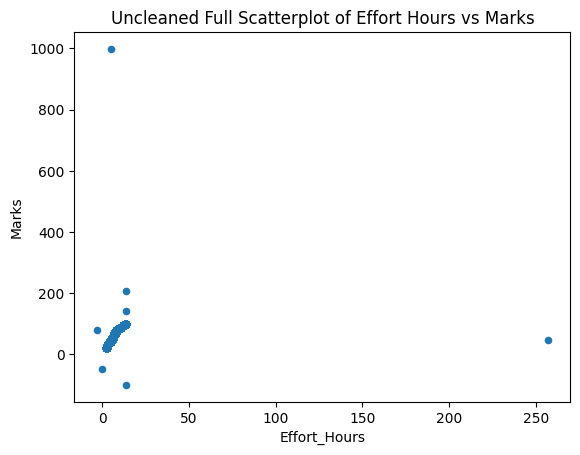

In [63]:
# This is the scatterplot for the original uncleaned data set and as we can see, there are multiple outliers
# that will hinder the predictive model. This is a Before image. 

performance_df.plot.scatter(x='Effort_Hours', y='Marks', title='Uncleaned Full Scatterplot of Effort Hours vs Marks')

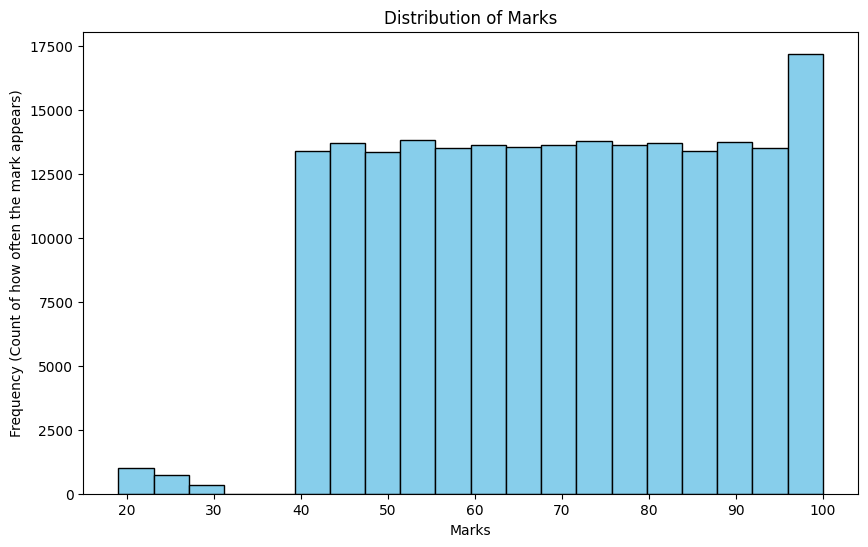

In [64]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(cleaned_performance_df['Marks'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency (Count of how often the mark appears)')
plt.show()

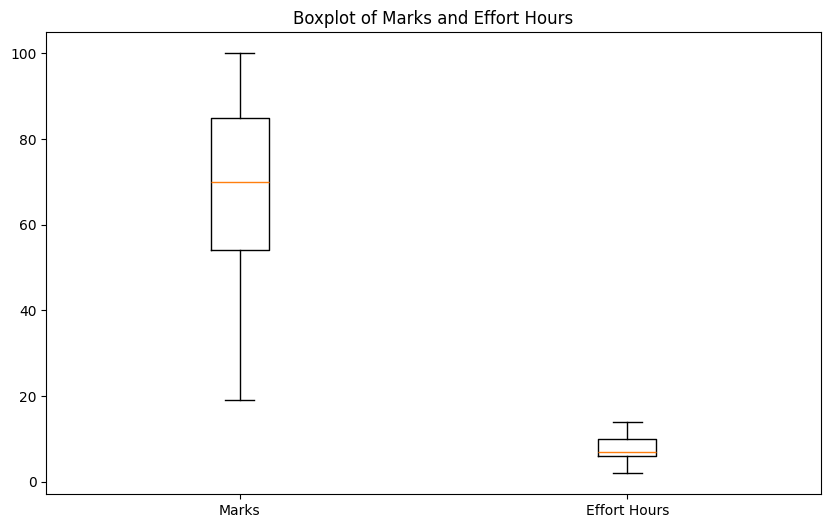

In [65]:
# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot([cleaned_performance_df['Marks'], cleaned_performance_df['Effort_Hours']], labels=['Marks', 'Effort Hours'])
plt.title('Boxplot of Marks and Effort Hours')
plt.show()

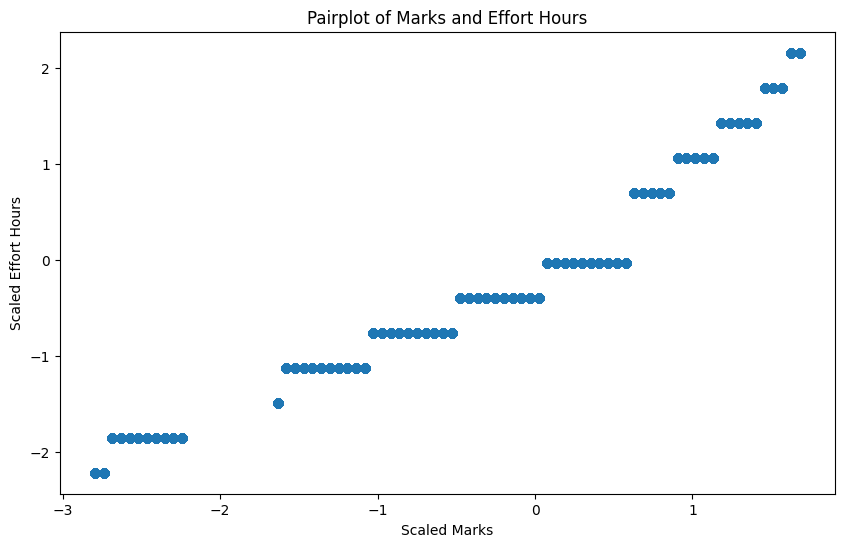

In [66]:
# Pair plot - StandardScaler was used to standardize the data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_performance_df[['Marks', 'Effort_Hours']])
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1])
plt.title('Pairplot of Marks and Effort Hours')
plt.xlabel('Scaled Marks')
plt.ylabel('Scaled Effort Hours')
plt.show()

# This just looks cool! 

In [67]:
# As mentioned in the report, this is the student specific cleaned dataset followed by feeding it into a linear regression model

student_specific_df = cleaned_performance_df[(cleaned_performance_df['Student_ID'] == 'SID20131151') 
                    | (cleaned_performance_df['Student_ID'] == 'SID20149500') 
                    | (cleaned_performance_df['Student_ID'] == 'SID20182516')]

student_specific_df.head()

student_specific_df.describe()


,Marks,Effort_Hours
count,166.000000,166.000000
mean,70.228916,8.138554
std,17.325634,2.637507
min,40.000000,4.000000
25%,56.250000,6.000000
50%,72.500000,8.000000
75%,84.000000,10.000000
max,100.000000,14.000000


<Axes: title={'center': 'Cleaned Student Specific Scatterplot of Effort Hours vs Marks'}, xlabel='Effort_Hours', ylabel='Marks'>

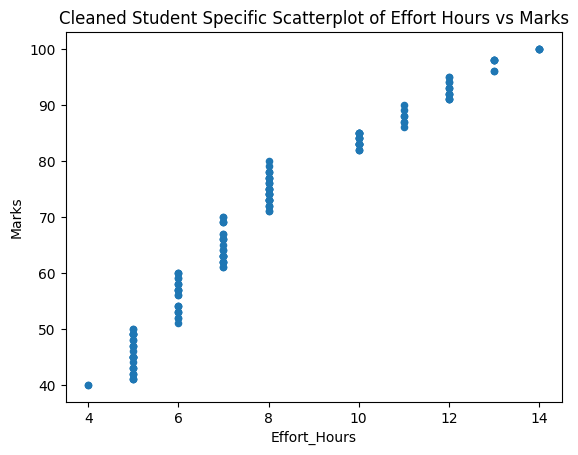

In [68]:
student_specific_df.plot.scatter(x='Effort_Hours', y='Marks', title='Cleaned Student Specific Scatterplot of Effort Hours vs Marks')

In [69]:
y = student_specific_df['Marks'].values.reshape(-1, 1)
X = student_specific_df['Effort_Hours'].values.reshape(-1, 1)

In [70]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
print('X shape:', X.shape)
print('X:', X)
print('X shape:', y.shape)
print('Y:', y)

X shape: (166, 1)
X: [[ 8.]
 [12.]
 [10.]
 [ 7.]
 [ 8.]
 [ 8.]
 [10.]
 [ 7.]
 [ 4.]
 [11.]
 [10.]
 [ 7.]
 [ 6.]
 [12.]
 [12.]
 [ 8.]
 [12.]
 [12.]
 [10.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 7.]
 [ 6.]
 [12.]
 [13.]
 [ 5.]
 [11.]
 [ 5.]
 [ 7.]
 [ 8.]
 [ 7.]
 [ 5.]
 [14.]
 [ 8.]
 [ 6.]
 [11.]
 [12.]
 [ 6.]
 [ 8.]
 [ 6.]
 [ 7.]
 [ 5.]
 [13.]
 [ 6.]
 [10.]
 [ 6.]
 [11.]
 [10.]
 [ 5.]
 [ 5.]
 [10.]
 [ 8.]
 [11.]
 [10.]
 [ 5.]
 [ 5.]
 [ 7.]
 [ 5.]
 [ 4.]
 [14.]
 [ 6.]
 [ 6.]
 [ 8.]
 [ 8.]
 [ 7.]
 [ 5.]
 [ 7.]
 [ 6.]
 [ 8.]
 [ 7.]
 [11.]
 [ 8.]
 [12.]
 [10.]
 [12.]
 [ 5.]
 [10.]
 [14.]
 [ 8.]
 [ 6.]
 [ 8.]
 [10.]
 [ 5.]
 [ 5.]
 [ 6.]
 [10.]
 [ 6.]
 [ 5.]
 [ 7.]
 [ 8.]
 [13.]
 [ 8.]
 [10.]
 [ 5.]
 [12.]
 [10.]
 [ 8.]
 [ 7.]
 [ 7.]
 [ 5.]
 [ 6.]
 [ 5.]
 [10.]
 [ 5.]
 [ 7.]
 [ 5.]
 [ 7.]
 [ 8.]
 [ 5.]
 [ 8.]
 [ 8.]
 [ 7.]
 [11.]
 [12.]
 [ 5.]
 [ 5.]
 [12.]
 [ 6.]
 [ 7.]
 [ 5.]
 [ 6.]
 [10.]
 [10.]
 [13.]
 [ 7.]
 [ 8.]
 [ 6.]
 [ 6.]
 [ 8.]
 [14.]
 [ 6.]
 [ 5.]
 [ 8.]
 [ 5.]
 [10.]
 [13.]
 [ 7.]
 [ 8.]
 [ 8.]

In [71]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [72]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Now we need to "fit" the line to our data: we use .fit with our X_tran and y_train data. 
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
print(regressor.intercept_)

[18.10670315]


In [74]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
print(regressor.coef_)

[[6.42662482]]


In [75]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
# Student Specific
score = regressor.predict([[10]]) # We are passing 10 in double brackets to have a 2-dimensional array
print(score)

[[82.37295137]]


In [76]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

    Actual   Predicted
0     46.0   50.239827
1     98.0  101.652826
2    100.0  108.079451
3     42.0   50.239827
4     73.0   69.519702
5     63.0   63.093077
6     49.0   50.239827
7     85.0   82.372951
8     50.0   50.239827
9     72.0   69.519702
10    56.0   56.666452
11    45.0   50.239827
12    78.0   69.519702
13    70.0   63.093077
14    91.0   95.226201
15    62.0   63.093077
16    52.0   56.666452
17    84.0   82.372951
18    53.0   56.666452
19    95.0   95.226201
20    50.0   50.239827
21    84.0   82.372951
22    52.0   56.666452
23    88.0   88.799576
24    48.0   50.239827
25    94.0   95.226201
26    83.0   82.372951
27   100.0  108.079451
28    45.0   50.239827
29   100.0  108.079451
30    76.0   69.519702
31    74.0   69.519702
32    67.0   63.093077
33    60.0   56.666452


In [77]:
### EVALUATING the Model ###
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"rmse = {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

mae = 3.59
mse = 19.83
rmse = 4.45
R-squared (R2): 0.9440660552430018


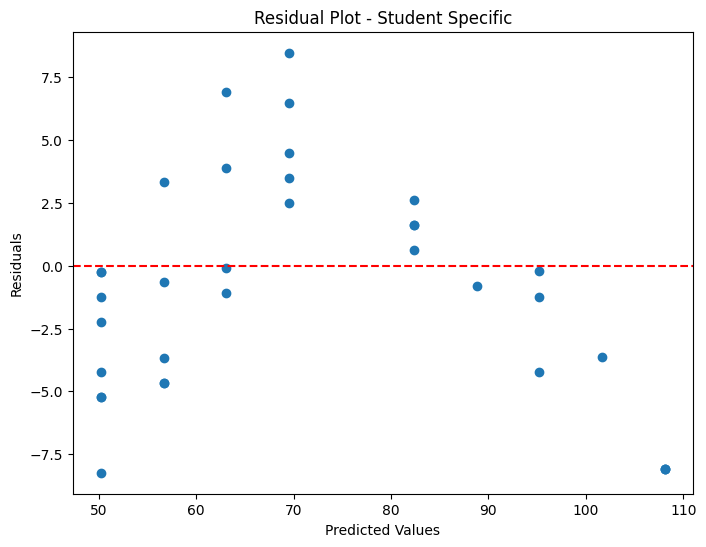

In [78]:
# Residual Plot for the 'Student-Specific' dataset that was cleaned
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot - Student Specific')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

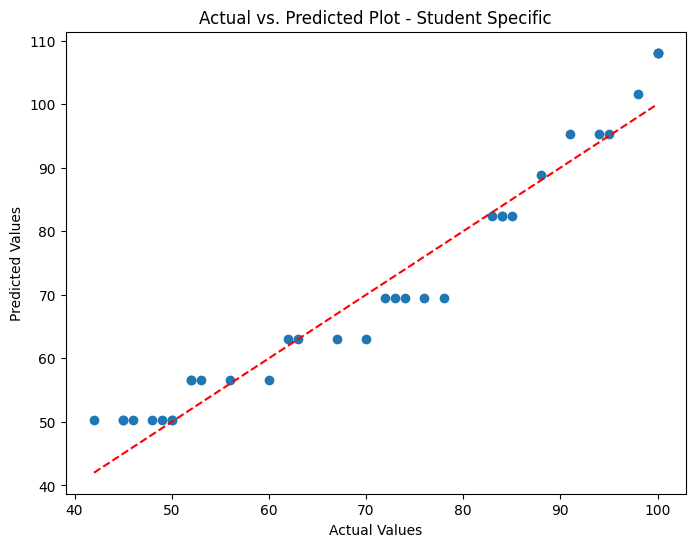

In [79]:
# Actual vs. Predicted Plot for the Student Specific Dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs. Predicted Plot - Student Specific')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

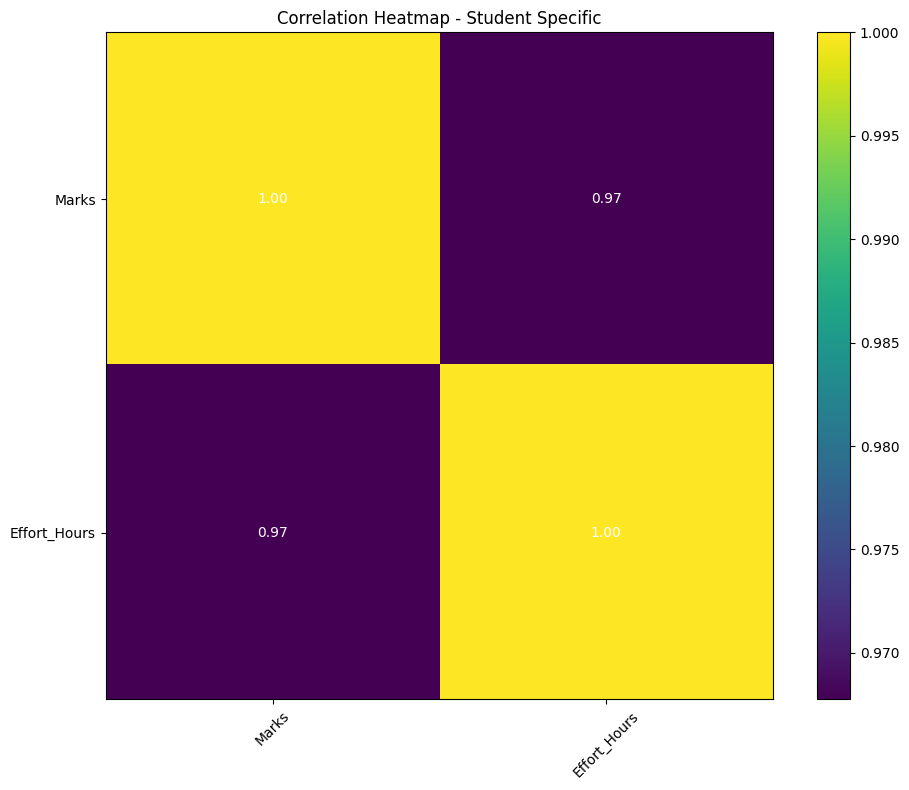

In [80]:
correlation_matrix = student_specific_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
heatmap = plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')

plt.colorbar(heatmap)
plt.title('Correlation Heatmap - Student Specific')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

# We did the correlation before as well but this is a more visual medium to share the info

In [81]:
# This is where the excess work for the linear regression modeling begins for the full and cleaned dataset. WEEEEEEEEEEEEEEEE
# We did this to then compare the predicted results of what happens when the datasets entered are different (condensed student specific version VS fuller version)

# There are two Linear Regression Models coded below where the first comes directly referenced
# to Orestes Appel and his code shown in class COMP 4522 - Winter 2024

# The second model was coded based on Rutu's prior experience in Articial Intelligence and Machine Learning courses
# in Mount Royal University

# Both versions are simply two ways of writing the Linear Regression Model

In [82]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
y = cleaned_performance_df['Marks'].values.reshape(-1, 1)
X = cleaned_performance_df['Effort_Hours'].values.reshape(-1, 1)

In [83]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
print('X shape:', X.shape)
print('X:', X)
print('X shape:', y.shape)
print('Y:', y)

X shape: (209600, 1)
X: [[ 5.]
 [ 8.]
 [ 8.]
 ...
 [ 5.]
 [11.]
 [ 8.]]
X shape: (209600, 1)
Y: [[44.]
 [74.]
 [80.]
 ...
 [49.]
 [87.]
 [73.]]


In [84]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [85]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Now we need to "fit" the line to our data: we use .fit with our X_tran and y_train data. 
regressor.fit(X_train, y_train)

LinearRegression()

In [86]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
print(regressor.intercept_)

[18.08535503]


In [87]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
print(regressor.coef_)

[[6.37110352]]


In [88]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
score = regressor.predict([[10]]) # We are passing 10 in double brackets to have a 2-dimensional array
print(score)

[[81.79639027]]


In [89]:
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

       Actual  Predicted
0        47.0  49.940873
1        78.0  69.054183
2        91.0  94.538597
3        53.0  56.311976
4        79.0  69.054183
...       ...        ...
41915    73.0  69.054183
41916    65.0  62.683080
41917    84.0  81.796390
41918    65.0  62.683080
41919    67.0  62.683080

[41920 rows x 2 columns]


In [90]:
# This is the 2nd version of the Linear Regression Model based on Rutu's experiences and learnings from her
# Articifical Intelligence and Machine Learning Classes at MRU

# Feel free to uncomment this section if you would like to run this model instead :)

# X = cleaned_performance_df[['Effort_Hours']]
# y = cleaned_performance_df['Marks']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared:", r2)


# next_paper_effort = 10 
# next_paper_grade = model.predict([[next_paper_effort]])
# print("Predicted grade for the next paper (assuming an effort of", next_paper_effort, "hours):", next_paper_grade[0])


In [91]:
### EVALUATING the Model ###
#Taken directly from Orestes Appel's course notes on Linear Regression - COMP 4522 Winter 2024
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"rmse = {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

mae = 3.73
mse = 22.19
rmse = 4.71
R-squared (R2): 0.9324671926544666


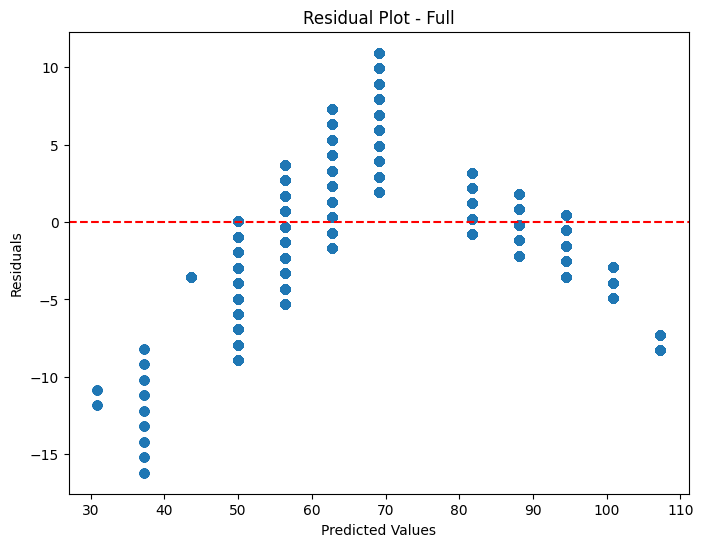

In [92]:
# Residuals provide valuable information about the goodness-of-fit of the regression model.
# If the residuals have a systematic pattern (all positive or negative), it indicates that the model is biased and does not capture certain features of the data.
# Large residuals may indicate outliers or influential data points that have a disproportionate impact on the model's performance.

# Residual Plot for the 'Full' dataset that was cleaned
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot - Full')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


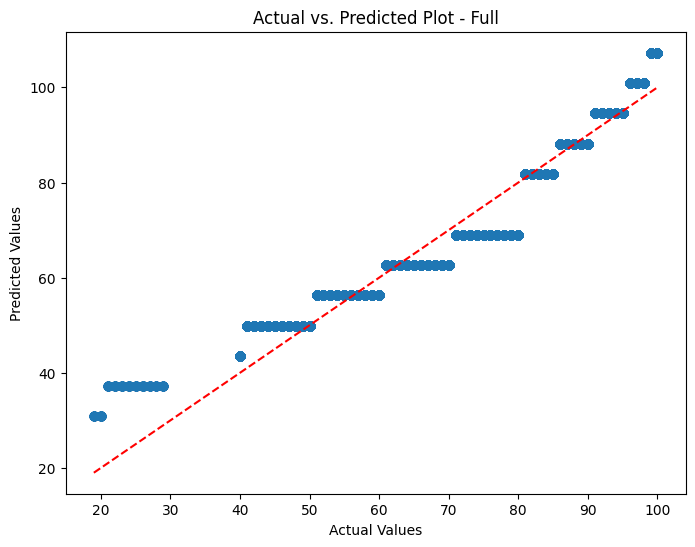

In [93]:
# Actual vs. Predicted Plot - Full Dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs. Predicted Plot - Full')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# This is just for fun! 

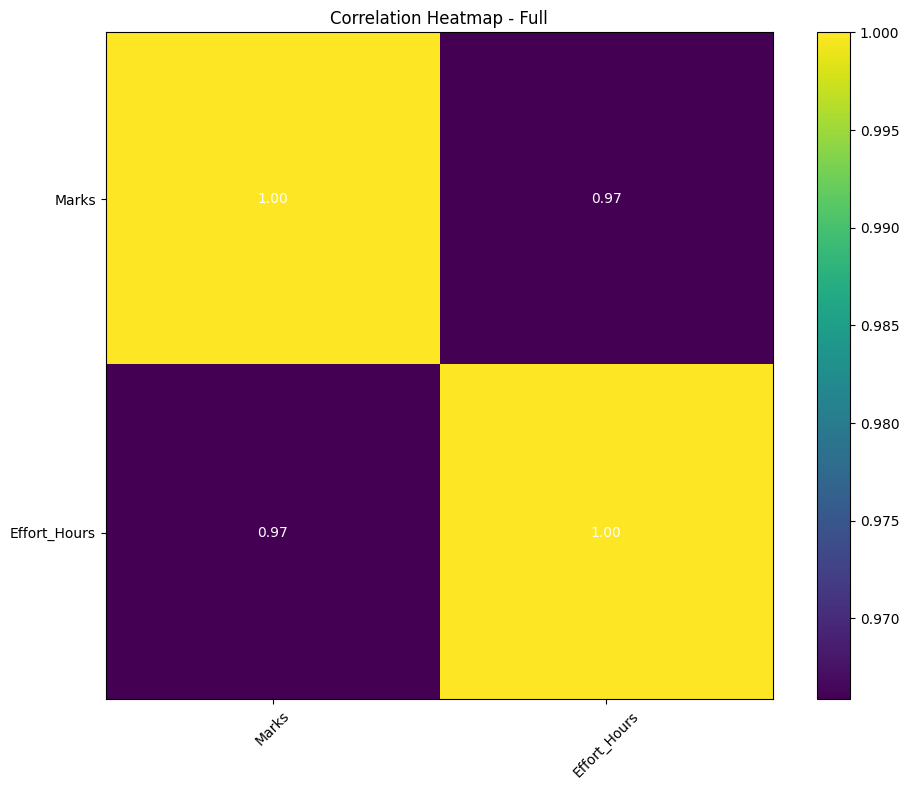

In [94]:
correlation_matrix = cleaned_performance_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
heatmap = plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')

plt.colorbar(heatmap)
plt.title('Correlation Heatmap - Full')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

# We did the correlation before as well but this is a more visual medium to share the info
